# Car Saleprice Predictor

### Problem Statement

Create a model that can be used to predict an appropriate price for a car

- Target Variable: Sale Price
- Predictors: Fuel type, Horsepower, Cylinders, etc

### Data Collection

#### Data collected from: https://www.kaggle.com/datasets/CooperUnion/cardataset

#### Variable Description

- Make: Brand/Manufacturer of the car
- Model: Model of the car
- Year: Year the car was made
- Engine Fuel Type: Type of fuel needed
- Engine HP: Horsepower of the car
- Engine Cylinders: Number of cylinders 
- Transmission Type: Type of transmission (Manual/Auto/Hybrid)
- Driven Wheels: Front/Rear/All wheel drive
- Number of Doors: Number of doors the car has
- Market Category: Category that the car fits into in the market
- Vehicle Size: Size of the car
- Vehicle Style: Type of car
- Highway MPG: Fuel efficiency on highways
- City MPG: Fuel efficiency in cities
- Popularity: Measure of how popular the car is
- MSRP: Manufacturer suggested retail price for the car

### Some other questions that we can attempt to answer include:
   - Does the brand of a car affect its price?
   - Effects of certain features on price of a car
   - Does popularity affect the price of the car?

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from dython import nominal
import warnings 
warnings.filterwarnings("ignore")
from dython import nominal

In [2]:
#Read in raw dataset and check for duplicates
data = pd.read_csv('data.csv')
print("Before dropping duplicates : ", data.shape)
data = data.drop_duplicates()
print("After dropping duplicates : ", data.shape)
#Removed about 700 duplicated entries

#Print sample of dataset
#Observe the different types of variables in the dataset

data.head(10)

Before dropping duplicates :  (11914, 16)
After dropping duplicates :  (11199, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


### Observe the distribution of MSRP to see what models would be appropriate

<AxesSubplot:xlabel='MSRP', ylabel='Count'>

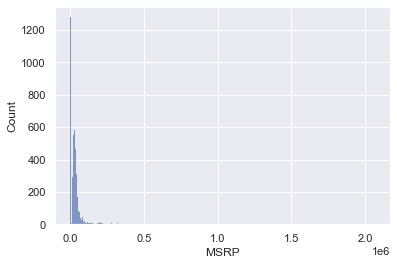

In [3]:
sb.histplot(x = data["MSRP"])

## Basic Data Exploration

In this step, we guage the overall data and identify the type of data for each variable in the dataset.

From this step, we also identify columns that clearly do not affect the price of a car, and can immediately remove the column from our dataset

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

We will remove null data entries at a later step

In [6]:
data.describe(include = 'all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11199,11199,11199.000000,11196,11130.000000,11169.000000,11199,11199,11193.000000,7823,11199,11199,11199.000000,11199.000000,11199.000000,1.119900e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1083,156,NaN,6658,NaN,NaN,7932,4354,NaN,1075,4395,2843,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.714528,NaN,253.388859,5.665950,NaN,NaN,3.454123,NaN,NaN,NaN,26.610590,19.731851,1558.483347,4.192593e+04
std,NaN,NaN,7.228211,NaN,110.150938,1.797021,NaN,NaN,0.872946,NaN,NaN,NaN,8.977641,9.177555,1445.668872,6.153505e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,172.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.159950e+04
50%,NaN,NaN,2015.000000,NaN,239.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,25.000000,18.000000,1385.000000,3.067500e+04
75%,NaN,NaN,2016.000000,NaN,303.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.303250e+04


In [7]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

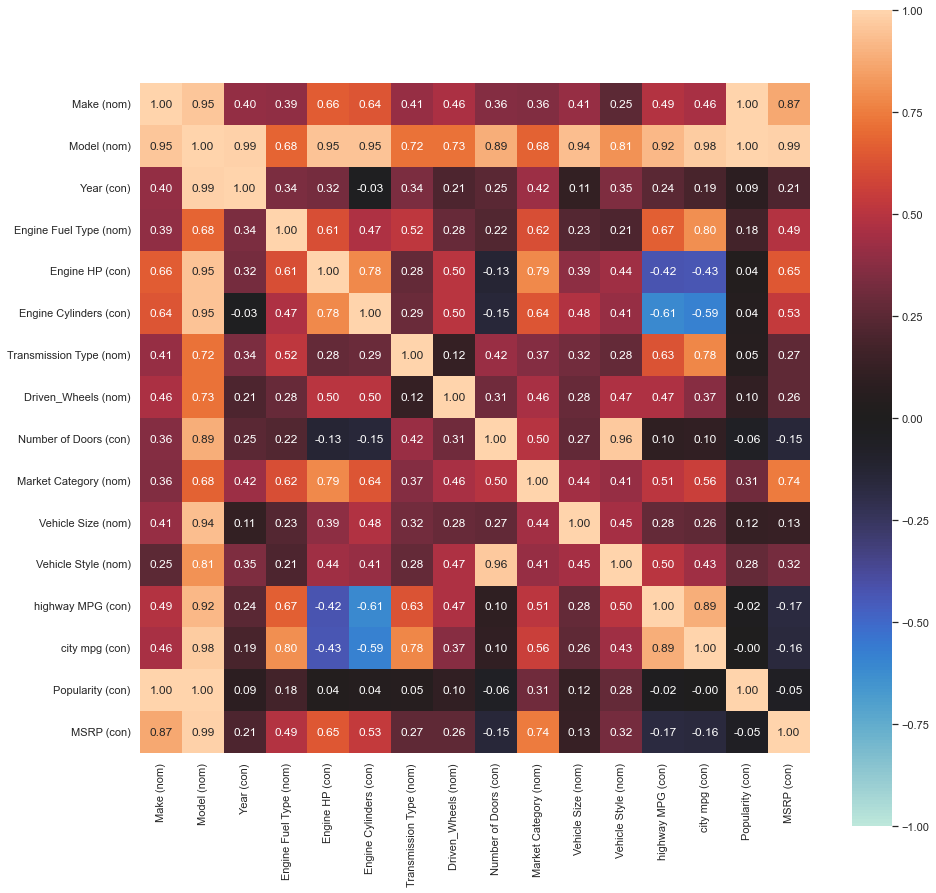

{'corr':                          Make (nom)  Model (nom)  Year (con)  \
 Make (nom)                 1.000000     0.954576    0.401922   
 Model (nom)                0.954576     1.000000    0.987301   
 Year (con)                 0.401922     0.987301    1.000000   
 Engine Fuel Type (nom)     0.393837     0.684522    0.336845   
 Engine HP (con)            0.659832     0.950133    0.322704   
 Engine Cylinders (con)     0.640367     0.945522   -0.033038   
 Transmission Type (nom)    0.413626     0.720297    0.343080   
 Driven_Wheels (nom)        0.461136     0.726012    0.205487   
 Number of Doors (con)      0.360343     0.888402    0.245113   
 Market Category (nom)      0.358145     0.675078    0.424145   
 Vehicle Size (nom)         0.408425     0.935168    0.114473   
 Vehicle Style (nom)        0.254551     0.805198    0.345911   
 highway MPG (con)          0.489033     0.915416    0.244972   
 city mpg (con)             0.459340     0.975555    0.188417   
 Popularity (con)

In [8]:
nominal.associations(data, figsize = (15,15), mark_columns = True)

##### From the correlation matrix above, we are able to pick out some variables that more significantly affect the price of a car to use for model building. We can see that there is a correlation of -0.05 between popularity and price, which shows that the popularity of a car does not actually affect its price.

## Basic Exploration Results

From the analysis above, we can create a report on the columns of the dataset to guide the rest of the project.

- Make: Categorical. Selected.
- Model: Qualitative. Not Selected.
- Year: Continuous. Selected.
- Engine Fuel Type: Qualitative. Not Selected.      
- Engine HP: Continuous. Selected.
- Engine Cylinders: Categorical. Selected.       
- Transmission Type: Qualitative. Not Selected.      
- Driven_Wheels: Qualitative. Not Selected.          
- Number of Doors: Categorical. Selected.        
- Market Category: Qualitative. Not Selected.        
- Vehicle Size: Qualitative. Not Selected.          
- Vehicle Style: Qualitative. Not Selected.         
- highway MPG: Continuous. Selected.         
- city mpg: Continuous. Selected.              
- Popularity: Continuous. Not Selected.            
- MSRP: Continuous. Selected. (Target Variable)                 

In [9]:
#Remove columns that are not selected.

data = data.drop(columns =["Model","Transmission Type","Driven_Wheels","Market Category","Vehicle Size","Vehicle Style", "Engine Fuel Type","Popularity"])

#Rename some columns for better readability.

data = data.rename(columns = {"Make":"Brand", "highway MPG":"Highway Fuel Usage", "city mpg":"City Fuel Usage", "MSRP":"Price","Engine HP":"Horsepower"})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               11199 non-null  object 
 1   Year                11199 non-null  int64  
 2   Horsepower          11130 non-null  float64
 3   Engine Cylinders    11169 non-null  float64
 4   Number of Doors     11193 non-null  float64
 5   Highway Fuel Usage  11199 non-null  int64  
 6   City Fuel Usage     11199 non-null  int64  
 7   Price               11199 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.0+ MB


In [11]:
#Dropping null values from Horsepower, Cylinders, Number of Doors
data = data.dropna(subset = ["Horsepower","Engine Cylinders", "Number of Doors"])

In [12]:
data.shape

(11100, 8)

#### Q: Does Brand affect the price of a car?



<AxesSubplot:xlabel='Brand', ylabel='Price'>

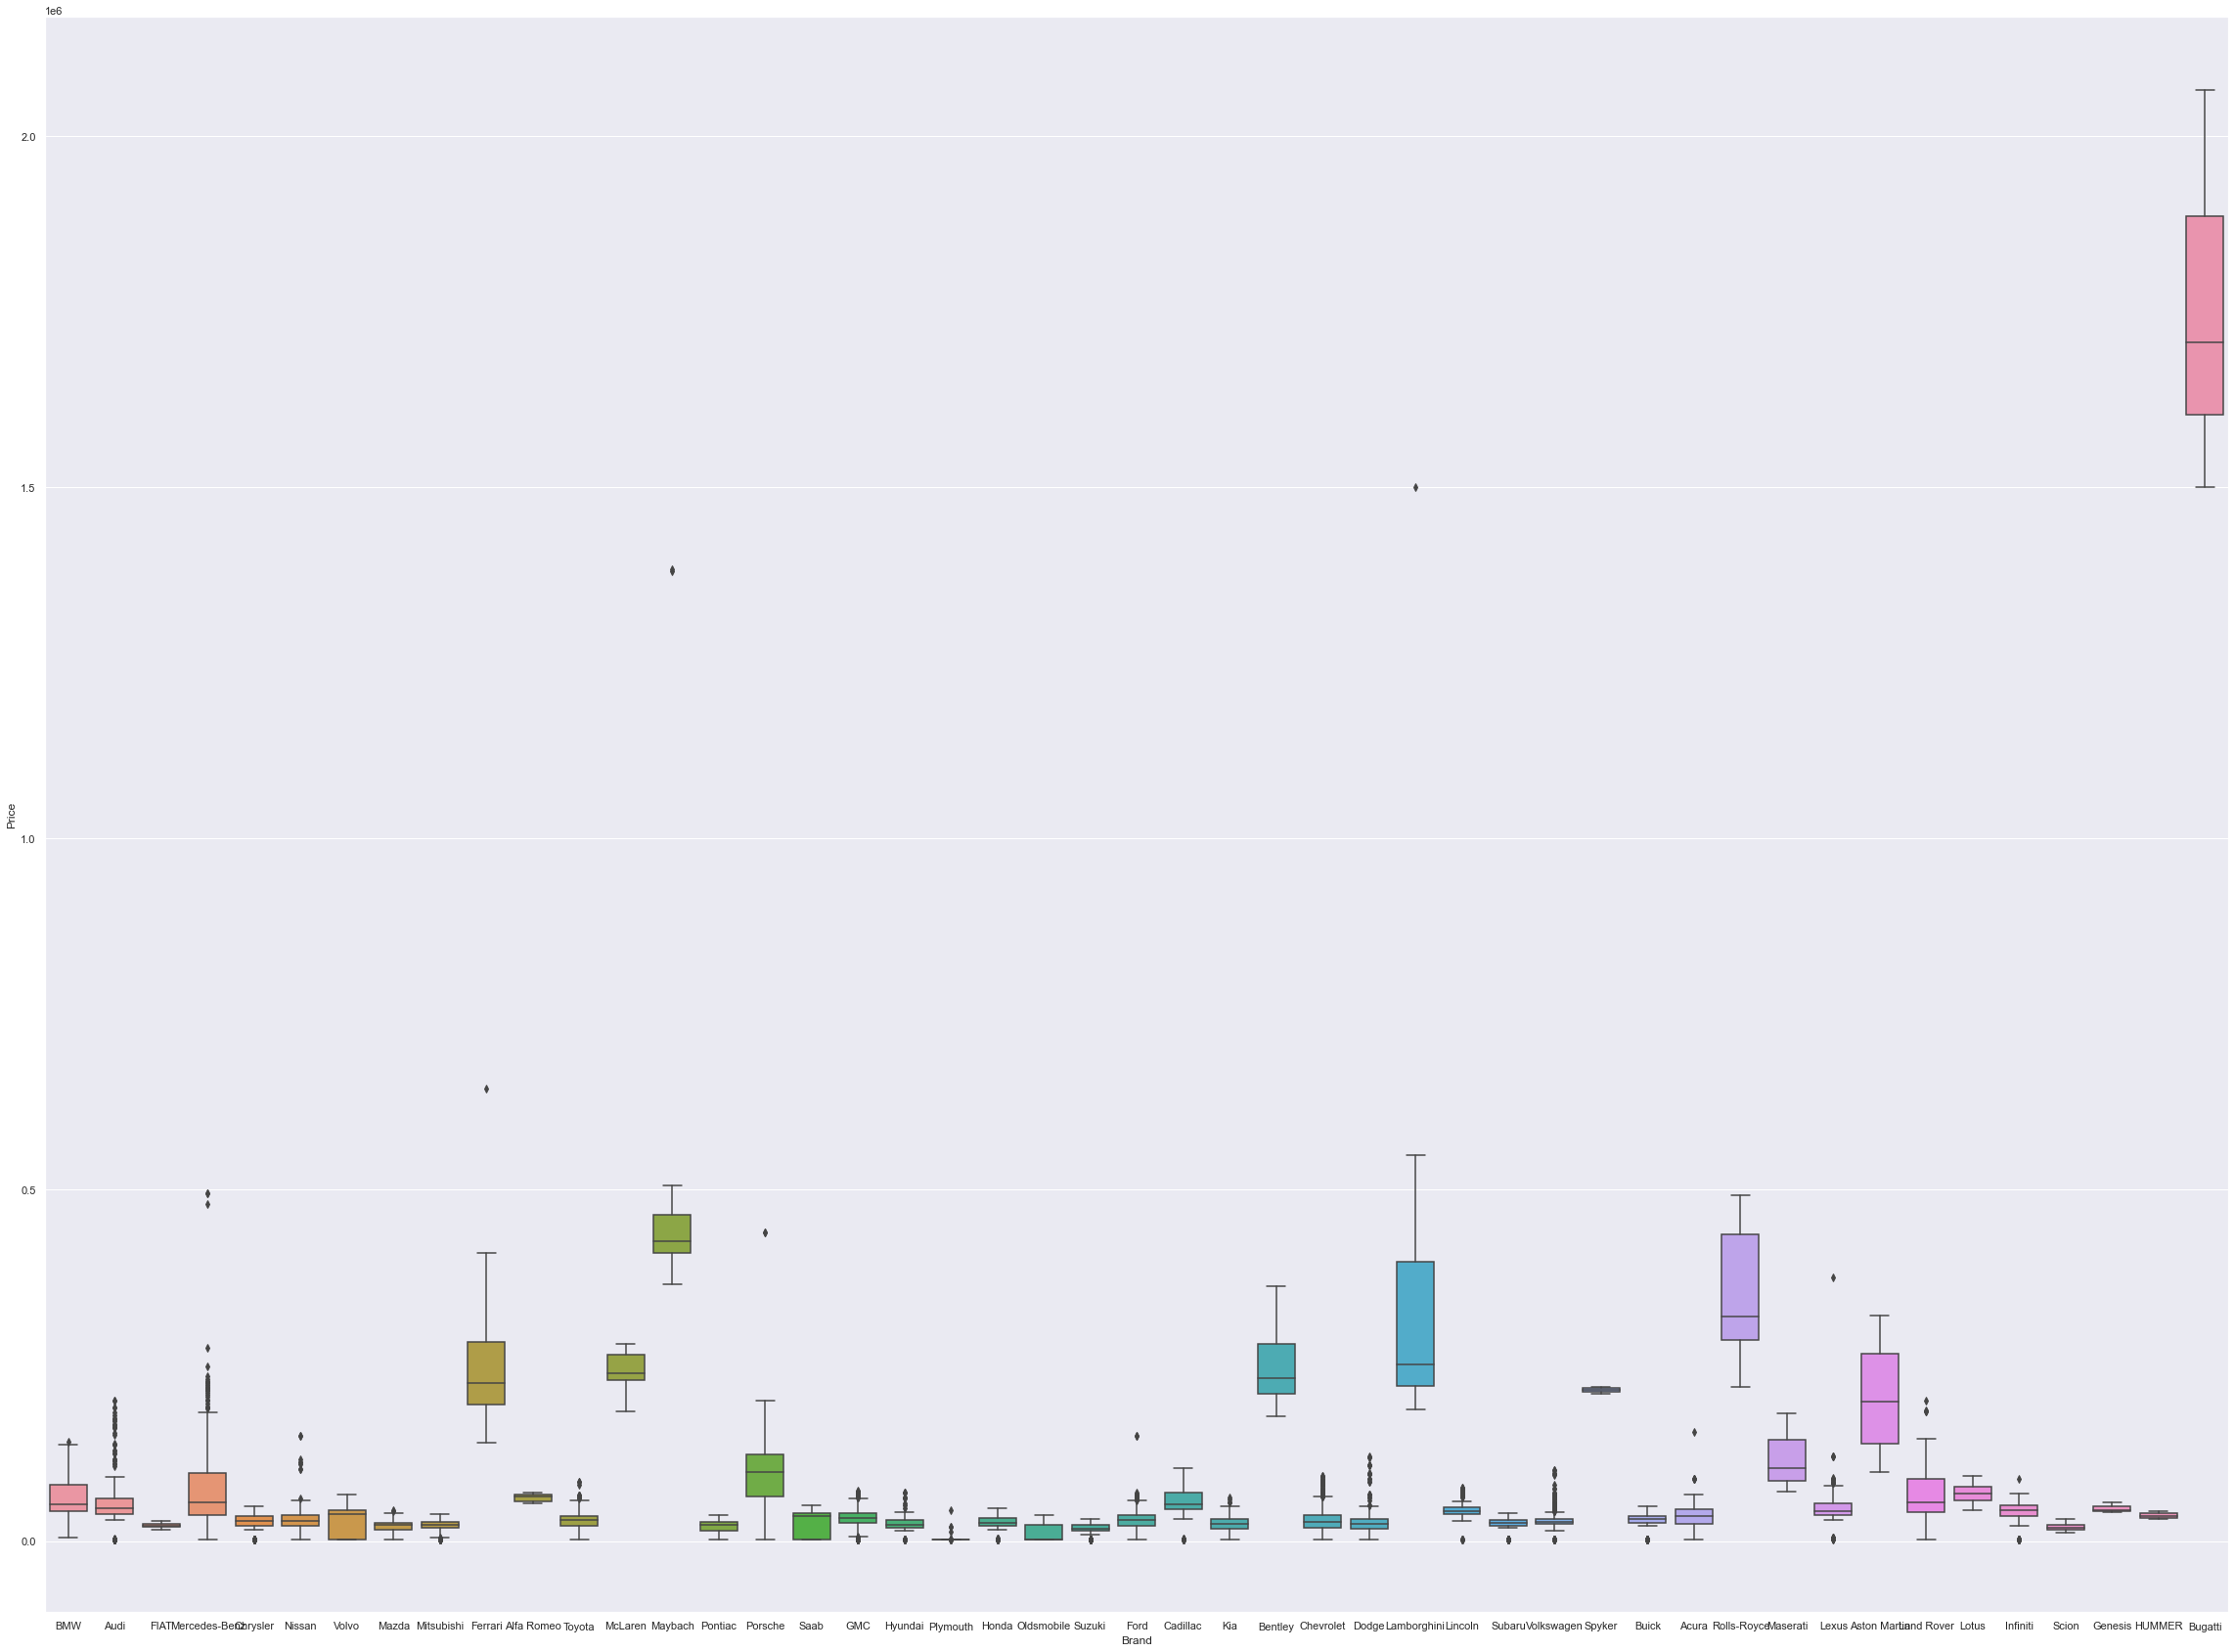

In [13]:
f = plt.figure(figsize=(40, 30))
sb.boxplot(x = 'Brand', y = 'Price', data = data)

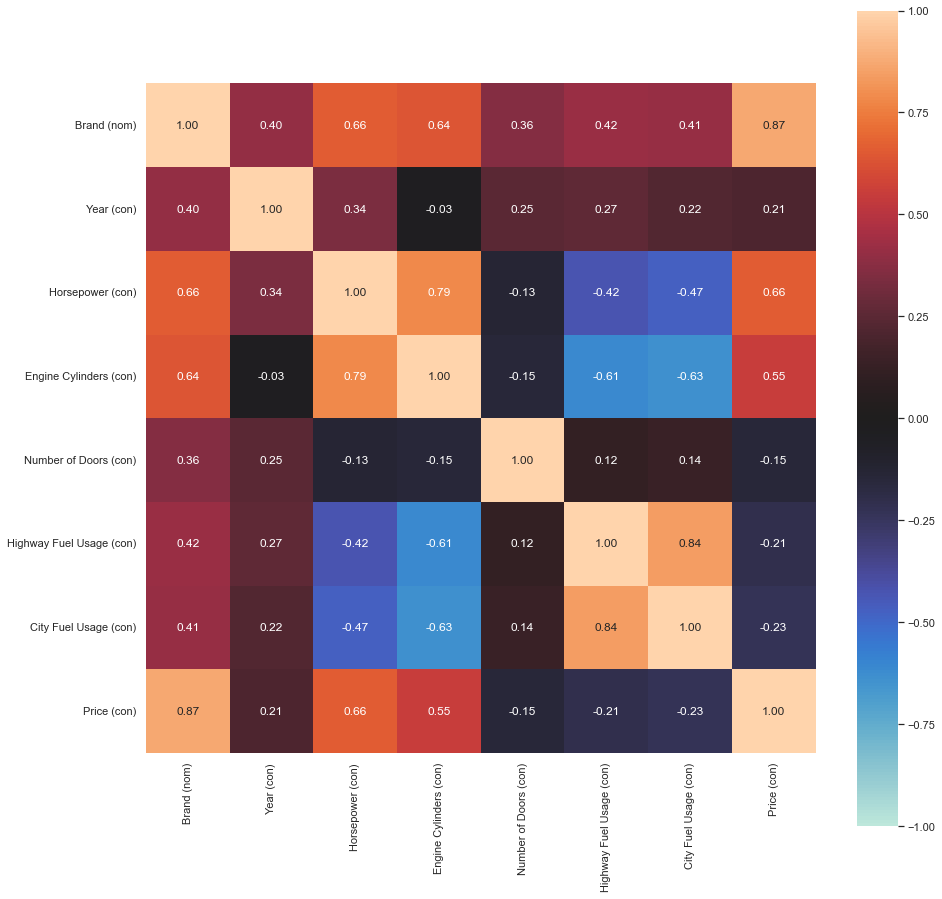

{'corr':                           Brand (nom)  Year (con)  Horsepower (con)  \
 Brand (nom)                  1.000000    0.400848          0.662333   
 Year (con)                   0.400848    1.000000          0.337445   
 Horsepower (con)             0.662333    0.337445          1.000000   
 Engine Cylinders (con)       0.638674   -0.026711          0.788187   
 Number of Doors (con)        0.359495    0.245974         -0.128624   
 Highway Fuel Usage (con)     0.421116    0.265607         -0.423646   
 City Fuel Usage (con)        0.410484    0.220111         -0.474667   
 Price (con)                  0.869973    0.209419          0.658990   
 
                           Engine Cylinders (con)  Number of Doors (con)  \
 Brand (nom)                             0.638674               0.359495   
 Year (con)                             -0.026711               0.245974   
 Horsepower (con)                        0.788187              -0.128624   
 Engine Cylinders (con)               

In [14]:
nominal.associations(data, figsize = (15,15), mark_columns = True)

##### From the plot of brands and price as well as the correlation between brands and price of 0.87, we can conclude that brands do affect the price of a car

##### We are also able to get a rough idea of how certain features affect the price of a car. 
   ##### For example
   - Horsepower has a moderate positive relation with the price of a car.

## Categorical Data Visualisation

<AxesSubplot:xlabel='Engine Cylinders', ylabel='count'>

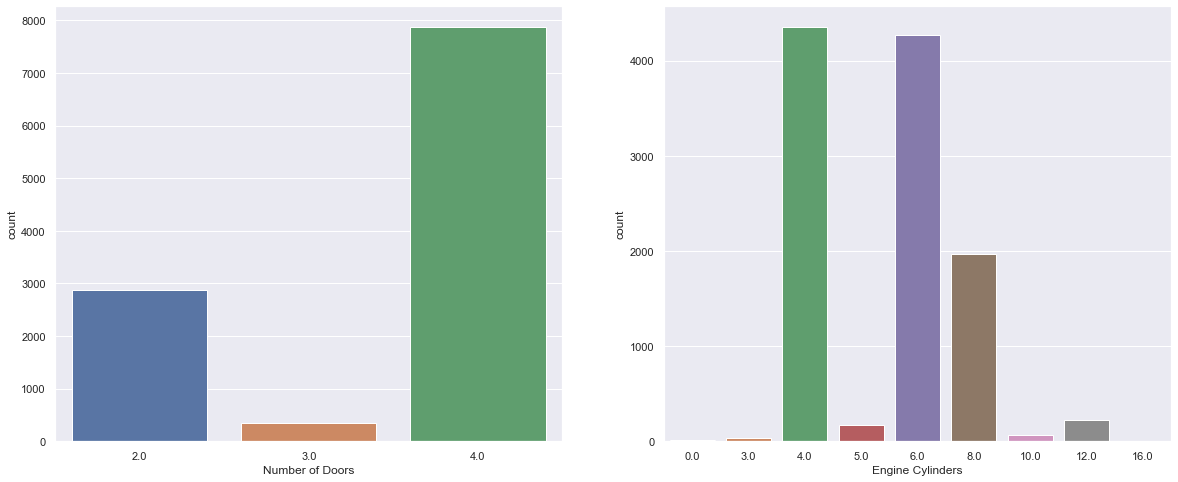

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))
sb.countplot(ax = axes[0], x = "Number of Doors", data = data)
sb.countplot(ax = axes[1], x = "Engine Cylinders", data = data)

Since there is enough rows in each category for the categorical data, we will keep them both for further analysis

## Continuous Data Visualisation

<AxesSubplot:xlabel='City Fuel Usage', ylabel='Count'>

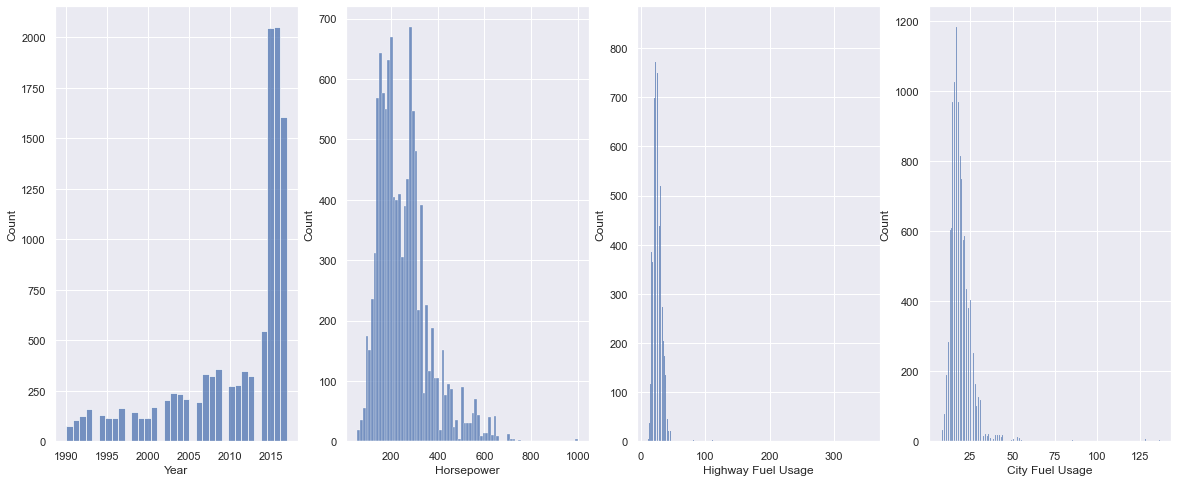

In [16]:
fig, axes = plt.subplots(1,4,figsize = (20,8))
sb.histplot(ax = axes[0], x = "Year", data = data)
sb.histplot(ax = axes[1], x = "Horsepower", data = data)
sb.histplot(ax = axes[2], x = "Highway Fuel Usage", data = data)
sb.histplot(ax = axes[3], x = "City Fuel Usage", data = data)

In [17]:
clean = data
clean.head(5)

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Highway Fuel Usage,City Fuel Usage,Price
0,BMW,2011,335.0,6.0,2.0,26,19,46135
1,BMW,2011,300.0,6.0,2.0,28,19,40650
2,BMW,2011,300.0,6.0,2.0,28,20,36350
3,BMW,2011,230.0,6.0,2.0,28,18,29450
4,BMW,2011,230.0,6.0,2.0,28,18,34500


Since outliers will cause the model to be biased, we will remove outlier entries in our dataset.

In [18]:
clean = clean[~(clean["Year"] < 2000)]

Cont = ["Price","Horsepower","Highway Fuel Usage","City Fuel Usage"]

Q1 = clean[Cont].quantile(0.25)
Q3 = clean[Cont].quantile(0.75)
IQR = Q3 - Q1

clean = clean[~((clean[Cont] < (Q1 - 1.5 * IQR)) |(clean[Cont] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Histograms to visualize target variable and other continuous variables after outlier treatment

<AxesSubplot:xlabel='Price', ylabel='Count'>

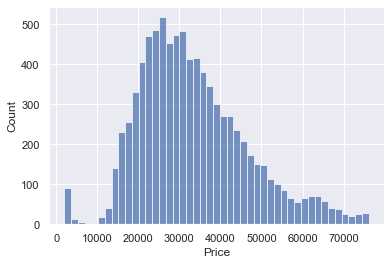

In [19]:
sb.histplot(x = clean["Price"])

The distribution of the target variable is good enough to proceed with regression model since theres enough data points for the model to learn from each type of values

<AxesSubplot:xlabel='City Fuel Usage', ylabel='Count'>

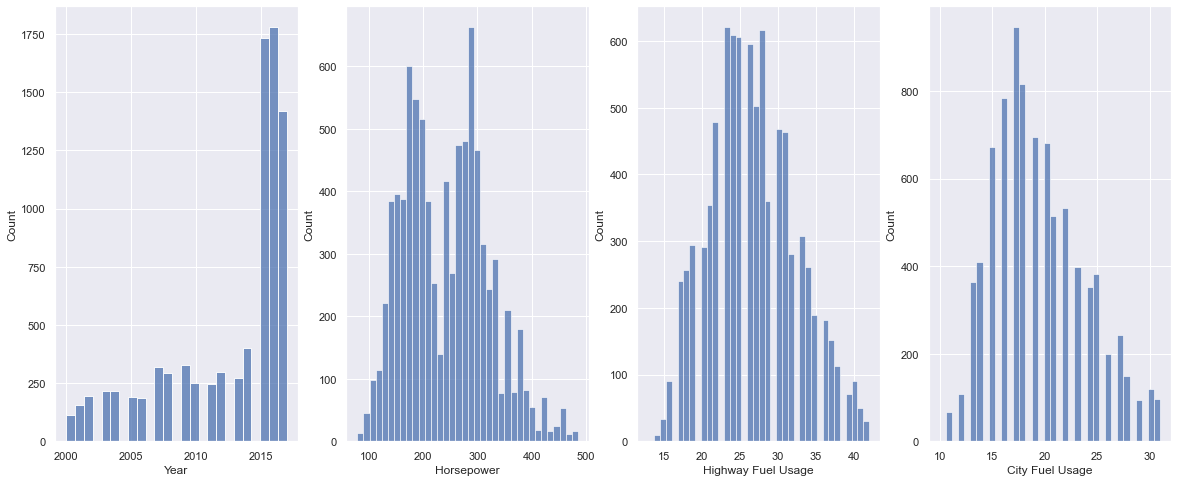

In [20]:
fig, axes = plt.subplots(1,4,figsize = (20,8))
sb.histplot(ax = axes[0], x = "Year", data = clean)
sb.histplot(ax = axes[1], x = "Horsepower", data = clean)
sb.histplot(ax = axes[2], x = "Highway Fuel Usage", data = clean)
sb.histplot(ax = axes[3], x = "City Fuel Usage", data = clean)

## Visualisation of relationship between continuous variables and car price

Here we use a combination of scatterplots as well as a correlation matrix to observe the relationshop between our continuous predictor variables and target variable.

<AxesSubplot:xlabel='City Fuel Usage', ylabel='Price'>

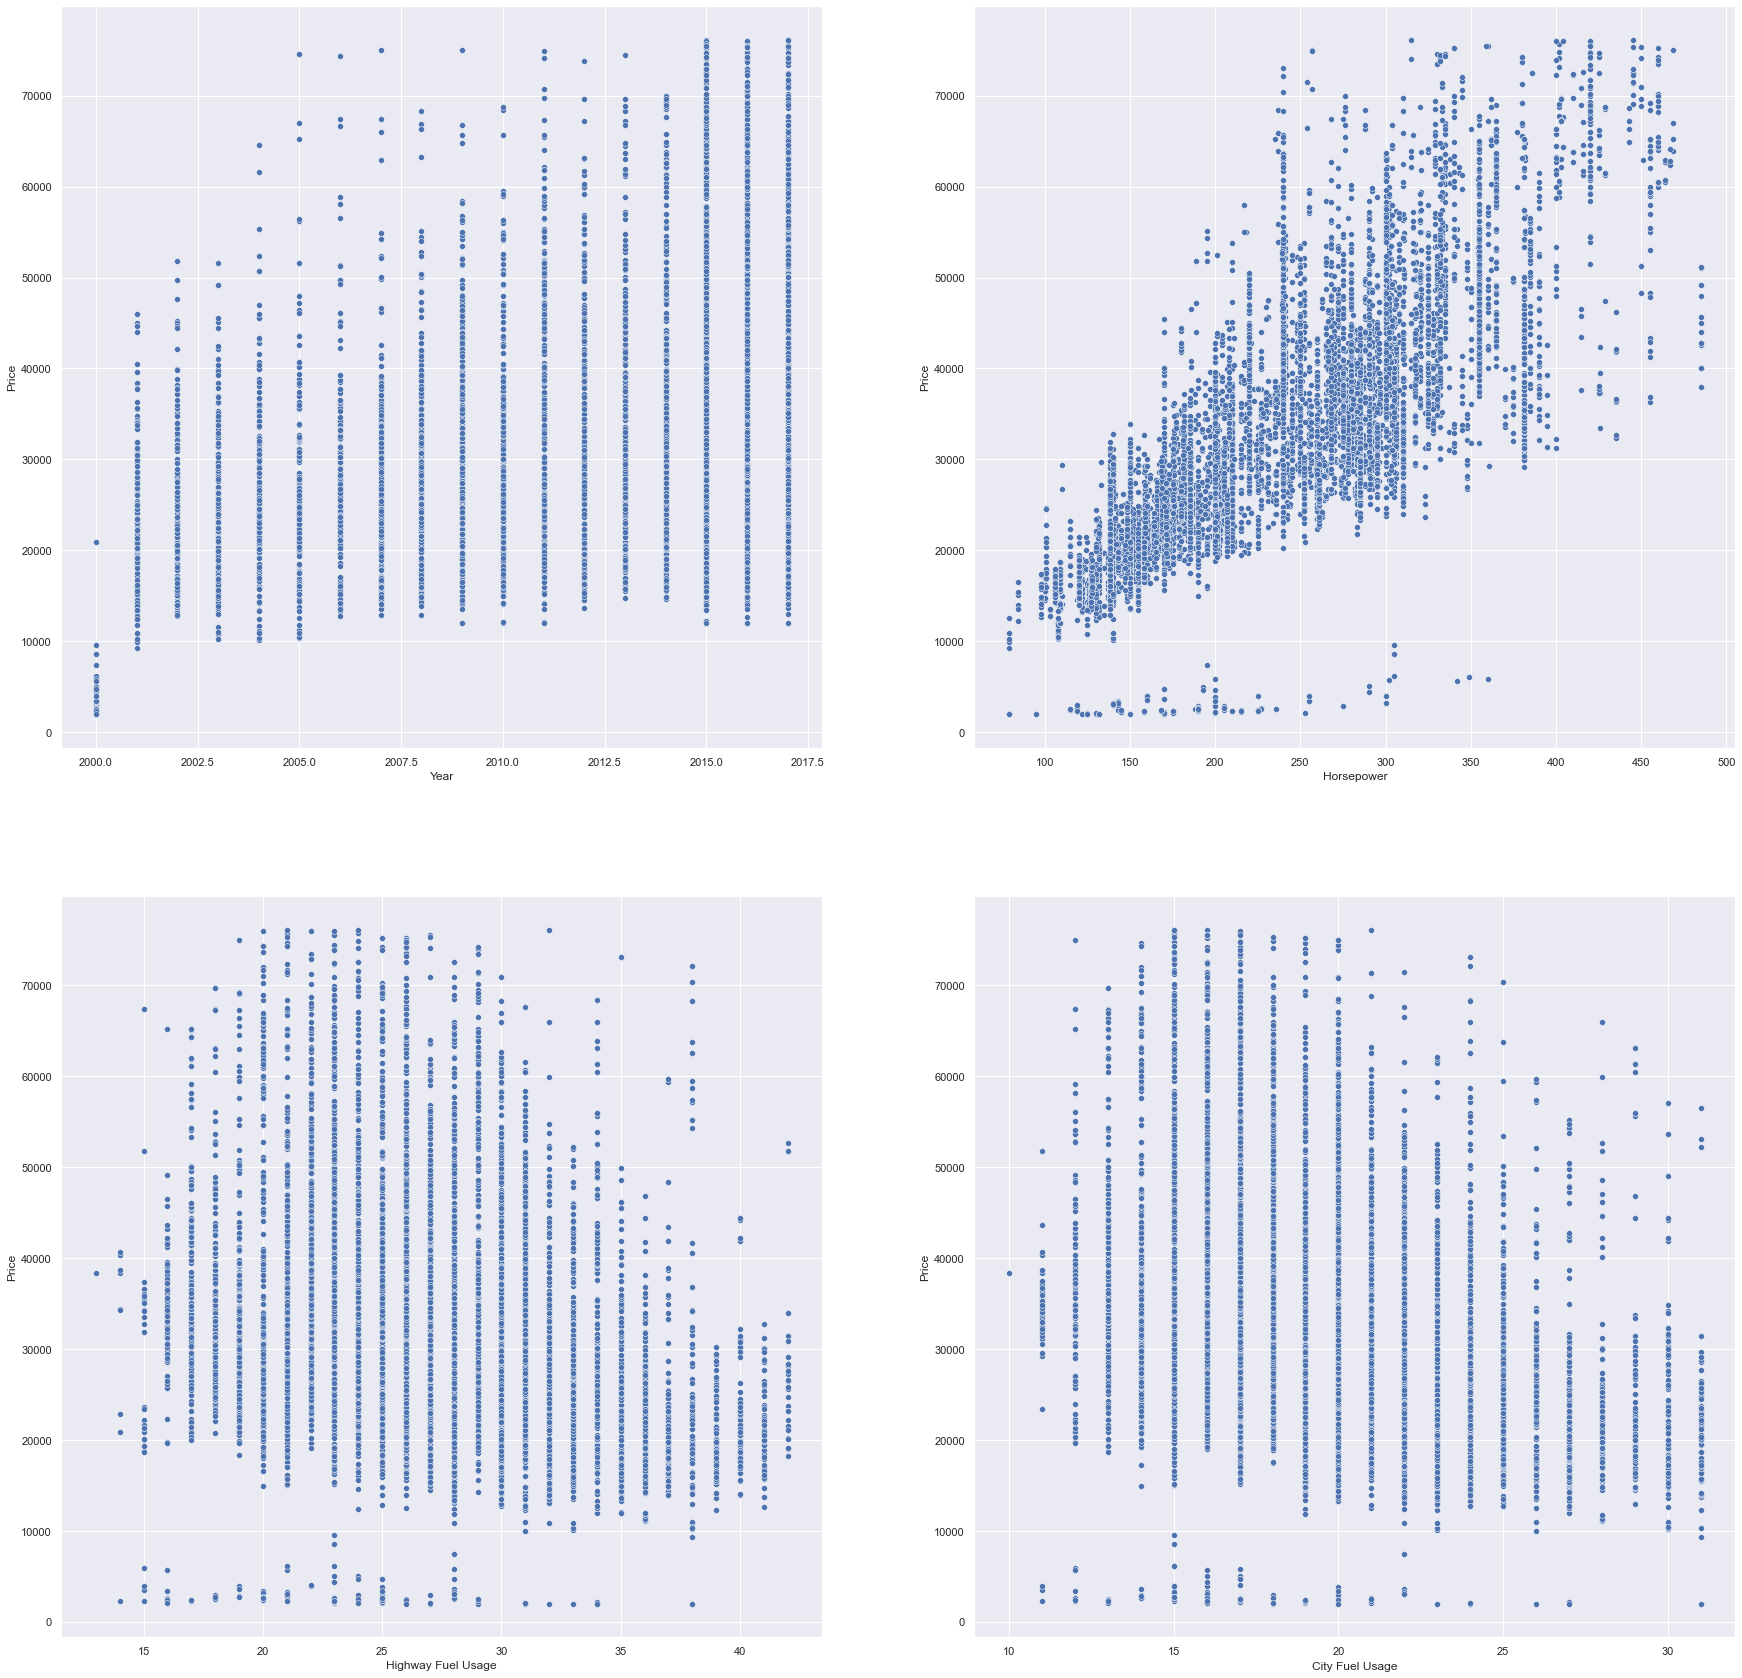

In [21]:
fig, axes = plt.subplots(2,2,figsize = (30,30))
sb.scatterplot(ax = axes[0][0], x = "Year", y = "Price", data = clean)
sb.scatterplot(ax = axes[0][1], x = "Horsepower", y = "Price", data = clean)
sb.scatterplot(ax = axes[1][0], x = "Highway Fuel Usage", y = "Price", data = clean)
sb.scatterplot(ax = axes[1][1], x = "City Fuel Usage", y = "Price", data = clean)

<AxesSubplot:>

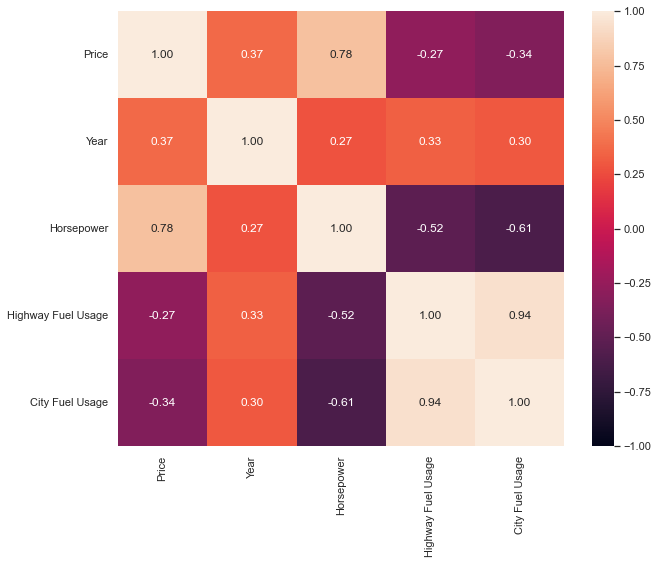

In [22]:
Cont = clean[["Price","Year","Horsepower","Highway Fuel Usage","City Fuel Usage"]]
fig = plt.figure(figsize = (10,8))
sb.heatmap(Cont.corr(),vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Observations

From the scatterplot, we can clearly see that there is some postive relation between [Year, Horsepower] and Price. We can also see that there is no obvious relationship between fuel usage and price. 

This is confirmed by the correlation matrix.
- Year/Price Correlation = 0.68
- Horsepower/Price Correlation = 0.74
- Highway Fuel Usage/Price Correlation = -0.07
- City Fuel Usage/Price Correlation = -0.14

Following these findings, we will drop fuel usage columns from the dataset to be used in the regression model.

In [23]:
#Drop both Fuel Usage Columns
clean = clean.drop(columns =["Highway Fuel Usage", "City Fuel Usage"])

In [24]:
clean.head(10)

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335.0,6.0,2.0,46135
1,BMW,2011,300.0,6.0,2.0,40650
2,BMW,2011,300.0,6.0,2.0,36350
3,BMW,2011,230.0,6.0,2.0,29450
4,BMW,2011,230.0,6.0,2.0,34500
5,BMW,2012,230.0,6.0,2.0,31200
6,BMW,2012,300.0,6.0,2.0,44100
7,BMW,2012,300.0,6.0,2.0,39300
8,BMW,2012,230.0,6.0,2.0,36900
9,BMW,2013,230.0,6.0,2.0,37200


## Visualisation of relationship between categorical varibles and car price

<AxesSubplot:xlabel='Number of Doors', ylabel='Price'>

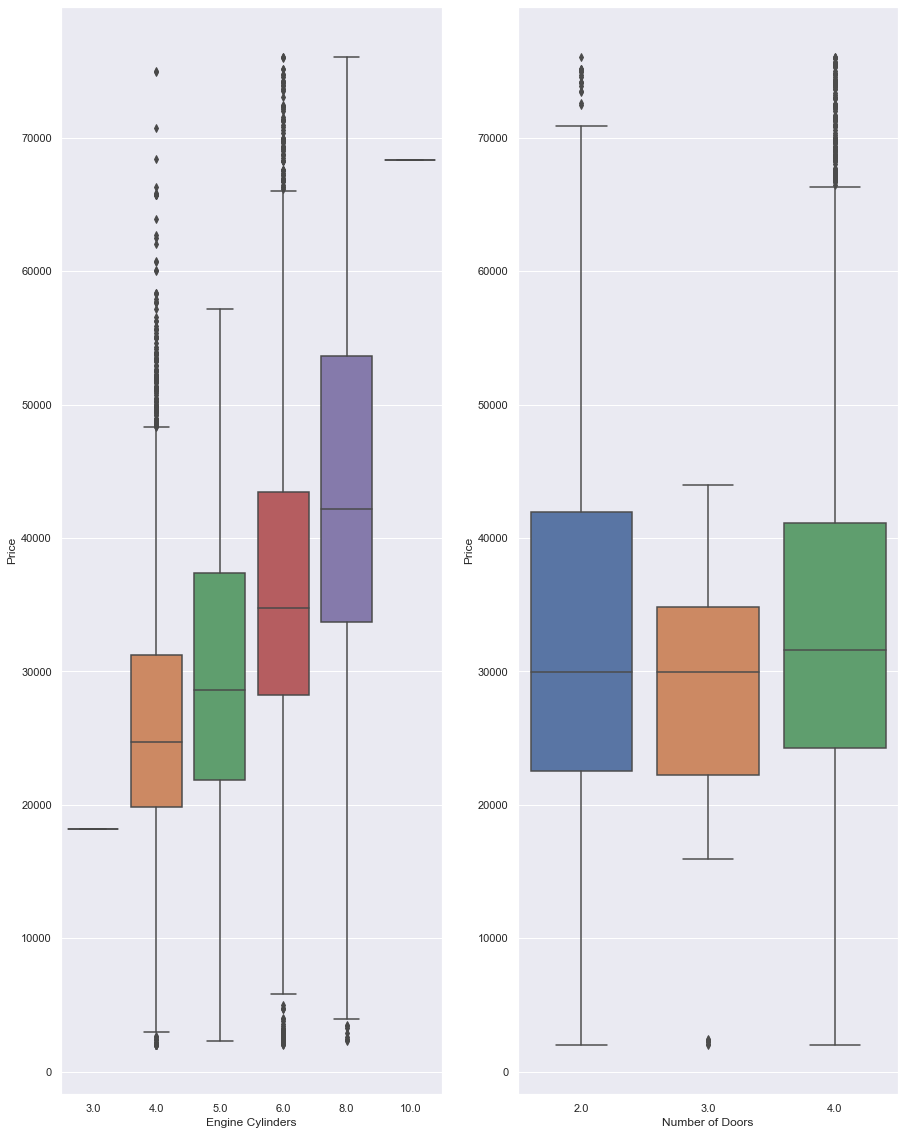

In [25]:
fig, axes = plt.subplots(1,2, figsize = (15,20))
sb.boxplot(ax = axes[0], x = "Engine Cylinders", y = "Price", data = clean)
sb.boxplot(ax = axes[1], x = "Number of Doors", y = "Price", data = clean)


##### From just the boxplots of our categorical data and price, we can see that there is some correlation between both "Engine Cylinder" and "Number of Doors" and Price. This helps to answer the question of the impact of features on price. 
- Horsepower (Moderately positive)
- Number of engine cylinders (Aside from 12 cylinder vehicles, increasing engine cylinders seem to indicate increase in price) 
- Number of doors (Slight effect on price)

Now, we will use ANOVA testing to calculate the correlation between the categorical data and car price

In [26]:
Cat = ["Engine Cylinders", "Number of Doors"]
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    
        # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

FunctionAnova(inpData=clean, 
              TargetVariable='Price', 
              CategoricalPredictorList=Cat)

##### ANOVA Results ##### 

Engine Cylinders is correlated with Price | P-Value: 0.0
Number of Doors is correlated with Price | P-Value: 1.703401653287533e-08


['Engine Cylinders', 'Number of Doors']

P-Value for both categorical data are both basically 0, meaning that both must have some correlation with the price of cars.

Since the data tells us that both the predictors have correlation with price, we will use them in our final selection of predictors for the model.

In [27]:
modeldata = clean
print(modeldata.head(10))
print(modeldata.shape)

#Save this dataset for deployment during modelling step
modeldata.to_csv("model_dat.csv", index = False)

  Brand  Year  Horsepower  Engine Cylinders  Number of Doors  Price
0   BMW  2011       335.0               6.0              2.0  46135
1   BMW  2011       300.0               6.0              2.0  40650
2   BMW  2011       300.0               6.0              2.0  36350
3   BMW  2011       230.0               6.0              2.0  29450
4   BMW  2011       230.0               6.0              2.0  34500
5   BMW  2012       230.0               6.0              2.0  31200
6   BMW  2012       300.0               6.0              2.0  44100
7   BMW  2012       300.0               6.0              2.0  39300
8   BMW  2012       230.0               6.0              2.0  36900
9   BMW  2013       230.0               6.0              2.0  37200
(8619, 6)
